In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing import image as kimage

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


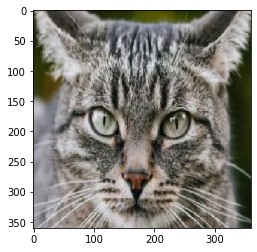

In [3]:
PATH = '/content/gdrive/My Drive/data/template-matching/'

# show results
import matplotlib
import matplotlib.pyplot as plt

# create a template
side = 360
template = kimage.load_img(PATH+'template_cat1.jpg', target_size=(side, side))

# show the template
plt.figure(figsize=(4,4))
plt.imshow(template)

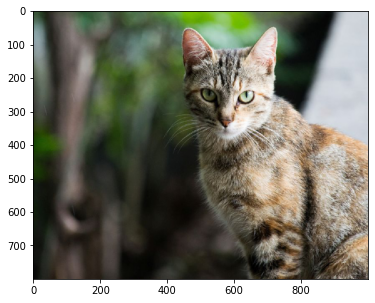

In [9]:
height = 800
width  = 1000

# load an image
image = kimage.load_img(PATH+'image2.jpg', target_size=(height, width))

# show the image
plt.figure(figsize=(6,6))
plt.imshow(image)

In [10]:
template_dim = np.expand_dims(template, axis=0)
image_dim    = np.expand_dims(image, axis=0)

print(template_dim.shape)
print(image_dim.shape)

(1, 360, 360, 3)
(1, 800, 1000, 3)


In [11]:
sim_data = []
for i in range(height-side+1):
  for j in range(width-side+1):
    patch = image_dim[0,i:i+side,j:j+side,:]
    sim = cosine_similarity(np.reshape(patch, (1, -1)), 
                            np.reshape(template_dim, (1,-1)))
    sim_data.append((sim[0][0], i, j))

print(len(sim_data))

282681


In [12]:
def getKey(item):
    return item[0]

sim_data_sorted = sorted(sim_data, key=getKey, reverse=True)
print(sim_data_sorted[:3])

[(0.8835169001088453, 0, 71), (0.8835118205276892, 0, 70), (0.8834997302204166, 0, 72)]


<Figure size 1152x1152 with 0 Axes>

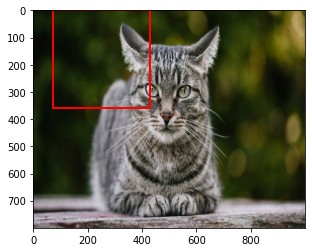

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

#im = Image.open(PATH+'image3.jpg')
im = kimage.load_img(PATH+'image1.jpg', target_size=(height, width))

plt.figure(figsize=(16,16))
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
for i in range(1): 
  rect = patches.Rectangle((sim_data_sorted[i][2], sim_data_sorted[i][1]), 
                           side, side, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

plt.show()